In [8]:
import pandas as pd
from sklearn.cluster import KMeans

scaled_df = pd.read_csv('data/scaled_data.csv', index_col=[0])

model = KMeans(n_clusters=4, random_state=123)
model.fit(scaled_df)

scaled_df['label'] = model.predict(scaled_df)
scaled_df['label'].value_counts()

label
0    97
3    68
2    31
1    29
Name: count, dtype: int64

<Axes: >

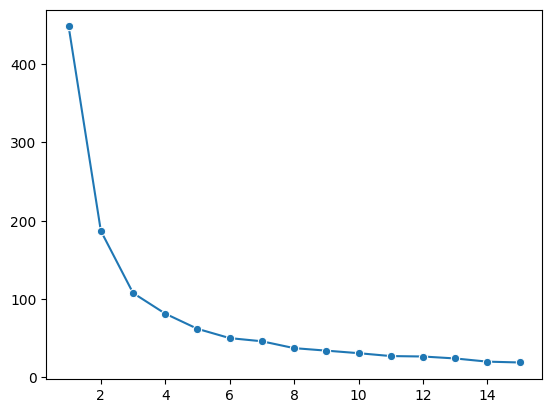

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

# IQR 이상치 제거를 위한 함수
def get_outlier_mask(df, weight=1.5):   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight

    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)

    return is_outlier


# 판다스 출력 결과를 소수점 2자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

# 데이터 불러오기
sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])

# 이상치 제거
outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)
sales_df = sales_df[~outlier_idx_cust_df]

# 표준화
df_mean = sales_df.mean()
df_std = sales_df.std()
scaled_df = (sales_df - df_mean)/df_std 
scaled_df.columns = ['total_buy_cnt', 'total_price']

# Elbow Method: k의 범위 1~15로 지정
ks = range(1,16) 
inertias = []  # inertia 값 저장할 리스트 

# k 값에 따른 inertia 값들 저장
for k in ks:
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# Elbow Method 시각화
sns.lineplot(x=ks, y=inertias, marker='o')


In [10]:
model = KMeans(n_clusters=5, random_state=123)
model.fit(scaled_df)

KMeans(n_clusters=5, random_state=123)

In [11]:
sales_df['label'] = model.predict(scaled_df)

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

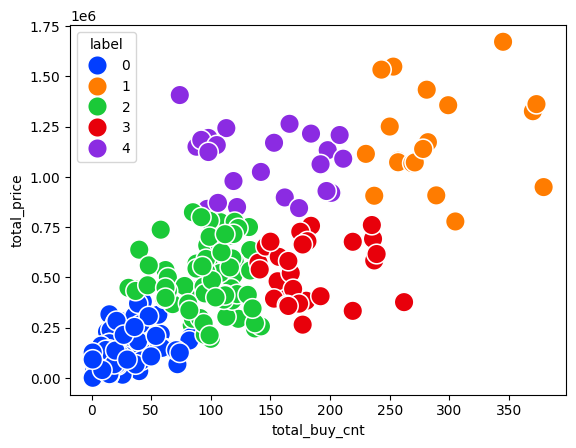

In [12]:
sns.scatterplot(x= sales_df['total_buy_cnt'], y= sales_df['total_price'], hue= sales_df['label'], s=200, palette='bright')

In [13]:
pd.DataFrame(sales_df['label'].value_counts())

,count
label,
0,81
2,74
3,28
4,23
1,19


In [14]:
groupby_df = sales_df.groupby('label').mean()

In [15]:
groupby_df['price_mean'] = groupby_df['total_price'] / groupby_df['total_buy_cnt']

In [16]:
groupby_df

,total_buy_cnt,total_price,price_mean
label,,,
0,27.63,"134,258.02","4,859.20"
1,287.79,"1,197,027.89","4,159.39"
2,96.42,"493,092.97","5,114.07"
3,182.86,"532,944.29","2,914.54"
4,143.48,"1,076,521.30","7,503.03"
